
# Classification Example

In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
# columns to nomrilized
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

Continuous features

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

Categorical features

In [13]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [14]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

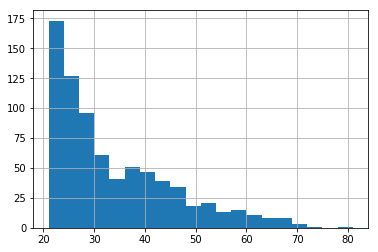

In [16]:
diabetes['Age'].hist(bins=20)

bucketize the Age

In [17]:
age_bucket =tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [18]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [19]:
# TRAIN TEST SPLIT
x_data = diabetes.drop('Class',axis=1)

In [20]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [23]:
# labels
labels = diabetes['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

## Part Two

In [26]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [27]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\VitoDH\\AppData\\Local\\Temp\\tmpqsnnuim8', '_save_checkpoints_steps': None}


In [29]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\VitoDH\AppData\Local\Temp\tmpqsnnuim8\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 532.159
INFO:tensorflow:step = 101, loss = 6.03025 (0.191 sec)
INFO:tensorflow:global_step/sec: 651.215
INFO:tensorflow:step = 201, loss = 6.90253 (0.155 sec)
INFO:tensorflow:global_step/sec: 739.551
INFO:tensorflow:step = 301, loss = 6.22189 (0.134 sec)
INFO:tensorflow:global_step/sec: 655.975
INFO:tensorflow:step = 401, loss = 4.59515 (0.151 sec)
INFO:tensorflow:global_step/sec: 796.389
INFO:tensorflow:step = 501, loss = 4.6181 (0.127 sec)
INFO:tensorflow:global_step/sec: 691.414
INFO:tensorflow:step = 601, loss = 5.64923 (0.144 sec)
INFO:tensorflow:global_step/sec: 705.301
INFO:tensorflow:step = 701, loss = 5.40382 (0.142 sec)
INFO:tensorflow:global_step/sec: 696.685
INFO:tensorflow:step = 801, loss = 5.15314 (0.145 sec)
INFO:tensorflow:global_step/sec: 687.616
IN

In [30]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [31]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-11-04-21:48:37
INFO:tensorflow:Restoring parameters from C:\Users\VitoDH\AppData\Local\Temp\tmpqsnnuim8\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-11-04-21:48:38
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.731602, accuracy_baseline = 0.649351, auc = 0.807284, auc_precision_recall = 0.655599, average_loss = 0.521167, global_step = 1000, label/mean = 0.350649, loss = 5.01623, prediction/mean = 0.358393


In [32]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [40]:
predictions = model.predict(pred_input_func)

In [41]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\VitoDH\AppData\Local\Temp\tmpqsnnuim8\model.ckpt-1000


In [42]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.5065726], dtype=float32),
  'logits': array([ 0.02629197], dtype=float32),
  'probabilities': array([ 0.49342737,  0.5065726 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.62394595], dtype=float32),
  'logits': array([ 0.50633073], dtype=float32),
  'probabilities': array([ 0.37605408,  0.62394595], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36024651], dtype=float32),
  'logits': array([-0.57429445], dtype=float32),
  'probabilities': array([ 0.63975352,  0.36024648], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.32734674], dtype=float32),
  'logits': array([-0.72021002], dtype=float32),
  'probabilities': array([ 0.67265326,  0.32734674], dtype=floa

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\VitoDH\\AppData\\Local\\Temp\\tmppqbaep4p', '_save_checkpoints_steps': None}


Need to embed the categorical features for DNN

In [44]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [45]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [46]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [51]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\VitoDH\\AppData\\Local\\Temp\\tmpbaio430j', '_save_checkpoints_steps': None}


In [52]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\VitoDH\AppData\Local\Temp\tmpbaio430j\model.ckpt.
INFO:tensorflow:step = 1, loss = 7.02406
INFO:tensorflow:global_step/sec: 616.637
INFO:tensorflow:step = 101, loss = 5.57168 (0.164 sec)
INFO:tensorflow:global_step/sec: 770.369
INFO:tensorflow:step = 201, loss = 4.33079 (0.131 sec)
INFO:tensorflow:global_step/sec: 766.132
INFO:tensorflow:step = 301, loss = 4.82434 (0.132 sec)
INFO:tensorflow:global_step/sec: 698.787
INFO:tensorflow:step = 401, loss = 2.22757 (0.141 sec)
INFO:tensorflow:global_step/sec: 697.203
INFO:tensorflow:step = 501, loss = 3.57784 (0.143 sec)
INFO:tensorflow:global_step/sec: 688.282
INFO:tensorflow:step = 601, loss = 3.85344 (0.145 sec)
INFO:tensorflow:global_step/sec: 687.732
INFO:tensorflow:step = 701, loss = 1.66226 (0.146 sec)
INFO:tensorflow:global_step/sec: 737.141
INFO:tensorflow:step = 801, loss = 4.06519 (0.136 sec)
INFO:tensorflow:global_step/sec: 685.841
I

In [53]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [54]:
results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-11-04-21:57:04
INFO:tensorflow:Restoring parameters from C:\Users\VitoDH\AppData\Local\Temp\tmpbaio430j\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-11-04-21:57:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.819506, auc_precision_recall = 0.695072, average_loss = 0.504934, global_step = 1000, label/mean = 0.350649, loss = 4.85999, prediction/mean = 0.394708
